<a href="https://colab.research.google.com/github/math-maven/introduction2pytorch/blob/main/introduction_to_pytorch_04_creating_a_simple_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from torchsummary import summary

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5,0.5)])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=True,transform = transform  )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32,shuffle =True)

100%|██████████| 26421880/26421880 [00:01<00:00, 21414907.53it/s]


Extracting /content/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 345207.56it/s]


Extracting /content/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6217822.48it/s]


Extracting /content/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18314060.21it/s]

Extracting /content/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=False,transform = transform  )
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32,shuffle =False)

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
1,28,28 > conv>>>>32,28,28 >>>pooling,>>32,14,14>>conv  >>>>64,14,14  pooling>>>>64,7,7 flatten>>>64*7*7 dense >>>>(64*7*7,10) softmax >>>>10

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN,self).__init__()
        self.layers = nn.Sequential(nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=2,padding =1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size =2 ),
                                    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding =1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size =2 ),
                                    nn.Flatten(),
                                    nn.Linear(64*7*7,10),
                                    nn.Softmax(dim =1)
                                              )



    def forward(self,x):
        outputs = self.layers(x)
        return outputs

In [ ]:
# class SimpleClassifier(nn.Module):
#     def __init__(self):
#         super(SimpleClassifier,self).__init__()
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(784,128)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(128,10)
#         self.softmax = nn.Softmax(dim =1)

#     def forward(self,x):
#         x = self.flatten(x)
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         outputs = self.softmax(x)
#         return outputs

In [ ]:
model = SimpleCNN()
model.to(device)

SimpleCNN(
  (layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=10, bias=True)
    (8): Softmax(dim=1)
  )
)

In [ ]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Flatten-7                 [-1, 3136]               0
            Linear-8                   [-1, 10]          31,370
           Softmax-9                   [-1, 10]               0
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 0.19
Estimated Total Size (MB): 0.86
---------------------------------------------

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
num_epoch =3

In [ ]:
for epoch in range(num_epoch):
    for i,(images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(f"epoch : {epoch+1} batch:{i}  , loss :{loss}")

epoch : 1 batch:0  , loss :2.3029613494873047
epoch : 1 batch:100  , loss :1.844369888305664
epoch : 1 batch:200  , loss :1.7971373796463013
epoch : 1 batch:300  , loss :1.8299692869186401
epoch : 1 batch:400  , loss :1.8196938037872314
epoch : 1 batch:500  , loss :1.9295217990875244
epoch : 1 batch:600  , loss :1.7731554508209229
epoch : 1 batch:700  , loss :1.8195011615753174
epoch : 1 batch:800  , loss :1.660549283027649
epoch : 1 batch:900  , loss :1.7717903852462769
epoch : 1 batch:1000  , loss :1.8321115970611572
epoch : 1 batch:1100  , loss :1.6924464702606201
epoch : 1 batch:1200  , loss :1.7142114639282227
epoch : 1 batch:1300  , loss :1.6796942949295044
epoch : 1 batch:1400  , loss :1.5321261882781982
epoch : 1 batch:1500  , loss :1.6232494115829468
epoch : 1 batch:1600  , loss :1.696037769317627
epoch : 1 batch:1700  , loss :1.6089675426483154
epoch : 1 batch:1800  , loss :1.6263949871063232
epoch : 2 batch:0  , loss :1.6183993816375732
epoch : 2 batch:100  , loss :1.6682772

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images,labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        predictions = torch.argmax(outputs ,dim =1)
        correct += (predictions==labels).sum().item()
        total += labels.size(0)
print(correct/total)

0.8865


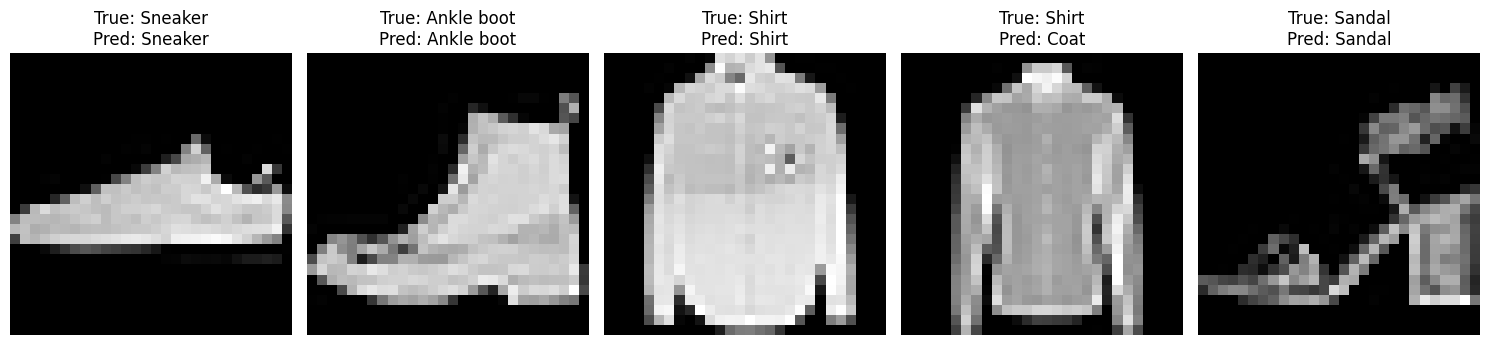

In [ ]:
import random


class_names =train_dataset.classes

num_samples = 5
sample_indices = random.sample(range(len(test_dataset)), num_samples)

model.eval()

plt.figure(figsize=(15, 10))
for idx, sample_idx in enumerate(sample_indices):
    image, label = test_dataset[sample_idx]
    image = image.unsqueeze(0)  # Add batch dimension
    image = image.to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        predicted_label = predicted.item()

    plt.subplot(2, num_samples, idx + 1)
    plt.imshow(image[0][0].to("cpu"), cmap='gray')
    plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()